<a href="https://colab.research.google.com/github/SparshKapoor-CODER/PyTorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imaporting Data for CNN (Using MNIST)

In [4]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets , transforms
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
%matplotlib inline

Converting MNIST files in 4D tensors

In [5]:
transform = transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root='cnn_data',train=True,download=True,transform=transform)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.62MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.95MB/s]


In [7]:
test_data = datasets.MNIST(root='cnn_data',train=False,download=True,transform=transform)

Creating Batches of Images from MNIST

In [8]:
TrainLoader = DataLoader(train_data,batch_size=1,shuffle=True)
TesTLoader = DataLoader(train_data,batch_size=1,shuffle=False)

# Define a CNN Model

Describing the convolutional layer

In [9]:
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,12,3,1)

Get one MNIST data

In [10]:
for i ,(X_train , y_train) in enumerate(TrainLoader):
  break

In [11]:
x= X_train.view(1,1,28,28)
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Performing our first convulution





*   1 image
*   6 images
*   26 x 26 image




In [12]:
x=F.relu(conv1(x))
x.shape

torch.Size([1, 6, 26, 26])

Wait a minute.....



Remamber the size of MNIST Data is 28 x 28




so why are we doing 26 x 26?

well the answer is there is a padding of 2 pixels in the images of the MNIST Dataset

pass through pooling layer

In [13]:
x = F.max_pool2d(x,2,2) #karnel of 2 and stride of 2
x.shape

torch.Size([1, 6, 13, 13])

* 1 image
* 26/2 = 13

lets do the second convolutional layer

In [14]:
x = F.relu(conv2(x))
x.shape

torch.Size([1, 12, 11, 11])

In [15]:
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 12, 5, 5])

11/2 = 5  as data  can not be in decimals

# Designing our model

In [16]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,60)
    self.fc3 = nn.Linear(60,10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    # review the data
    X = X.view(-1,5*5*16)

    #Fulley connected Layers

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,60)
    self.fc3 = nn.Linear(60,10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    # review the data
    X = X.view(-1,5*5*16)

    #Fulley connected Layers

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)

Create an instence

In [17]:
torch.manual_seed(33)
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)

Loss function optimizer

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [19]:
Start_time = time.time()

#create variables
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#For loops
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  #Training
  for b , (X_train , y_train) in enumerate(TrainLoader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)

    predicted = torch.max(y_pred.data,1)[1]
    # Call the sum() function to get the actual sum
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    #Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Print results
    if b%100 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  #Testing
  with torch.no_grad():
    for b , (X_test , y_test) in enumerate(TesTLoader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)


Current_time = time.time()
net_time = Current_time - Start_time
print(f'Training took  {net_time}s')

Streaming output truncated to the last 5000 lines.
Epoch: 1  Batch: 40200  Loss: 0.00201094476506114
Epoch: 1  Batch: 40300  Loss: 0.012139014899730682
Epoch: 1  Batch: 40400  Loss: 0.0
Epoch: 1  Batch: 40500  Loss: 0.0001961992384167388
Epoch: 1  Batch: 40600  Loss: 0.04649856314063072
Epoch: 1  Batch: 40700  Loss: 0.0001902399235405028
Epoch: 1  Batch: 40800  Loss: 4.291525328881107e-06
Epoch: 1  Batch: 40900  Loss: 0.0
Epoch: 1  Batch: 41000  Loss: 0.01153737772256136
Epoch: 1  Batch: 41100  Loss: 0.0
Epoch: 1  Batch: 41200  Loss: 0.0
Epoch: 1  Batch: 41300  Loss: 0.0004558716027531773
Epoch: 1  Batch: 41400  Loss: 1.1920928244535389e-07
Epoch: 1  Batch: 41500  Loss: 0.00022837892174720764
Epoch: 1  Batch: 41600  Loss: 7.152555099310121e-07
Epoch: 1  Batch: 41700  Loss: 0.037718430161476135
Epoch: 1  Batch: 41800  Loss: 0.0010213402565568686
Epoch: 1  Batch: 41900  Loss: 6.079655122448457e-06
Epoch: 1  Batch: 42000  Loss: 4.184158387943171e-05
Epoch: 1  Batch: 42100  Loss: 0.0
Epoch

# **Graphing** **our** **Results**

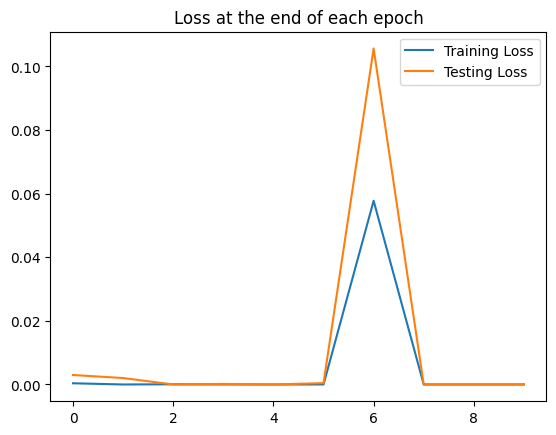

In [20]:
plt.plot([t.item() if isinstance(t, torch.Tensor) else t for t in train_losses], label='Training Loss')
plt.plot([t.item() if isinstance(t, torch.Tensor) else t for t in test_losses], label='Testing Loss')
plt.title('Loss at the end of each epoch')
plt.legend()

Graph the accuracy

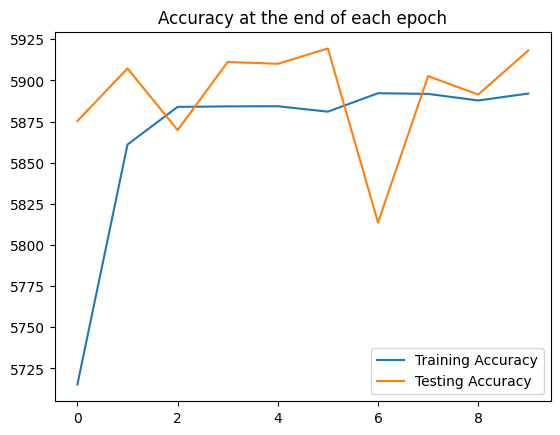

In [21]:
plt.plot([t/10 for t in train_correct], label='Training Accuracy')
plt.plot([t/10 for t in test_correct], label='Testing Accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()


In [23]:
test_load_everything = DataLoader(test_data, batch_size = 20000, shuffle=False)

In [24]:
with torch.no_grad():
  correct = 0
  for images , labels in test_load_everything:
    labels_pred = model(images)
    predicted = torch.max(labels_pred.data,1)[1]
    correct += (predicted == labels).sum()

In [25]:
correct.item()/len(test_data) *100

97.99

# **Running the model with an image as input**

In [26]:
test_data[9692]  # tensor with an image and a lable

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

grab the data

In [27]:
test_data[7589][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Reshape it

In [28]:
test_data[7589][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

Show the image

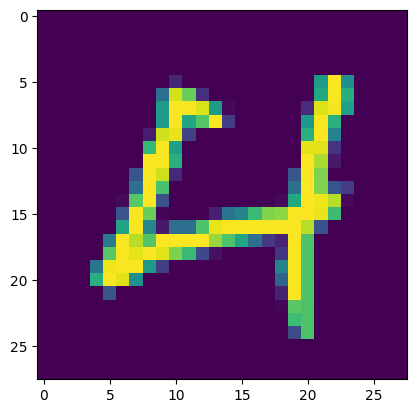

In [29]:
plt.imshow(test_data[2005][0].reshape(28,28))

Pass the image in model

In [30]:
model.eval()
with torch.no_grad():
  new_pridiction = model(test_data[2005][0].view(1,1,28,28))

new_pridiction.argmax()

tensor(4)

Get an image

In [39]:
test_data[4133]


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.7451, 1.0000, 0.9922,
           0.9922, 0.9922, 0.8549, 0.4745, 

Get just the data

In [37]:
test_data[4133][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.7451, 1.0000, 0.9922,
          0.9922, 0.9922, 0.8549, 0.4745, 0.1490, 0.0000,

Reshape

In [38]:
test_data[4133][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0275, 0.7451, 1.0000, 0.9922, 0.9922, 0.9922,
         0.8549, 0.4745, 0.1490, 0.0000, 0.0000, 0.0000

Get the image

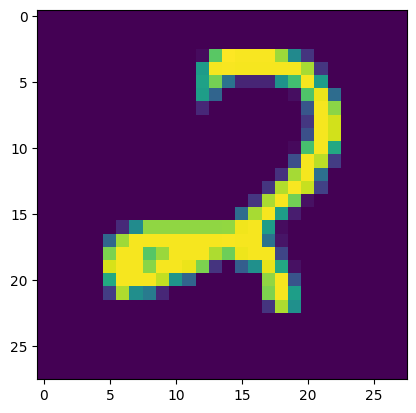

In [40]:
plt.imshow(test_data[4133][0].reshape(28,28))

Lets pass the image

In [41]:
model.eval()
with torch.no_grad():
  new_pridiction = model(test_data[4133][0].view(1,1,28,28))

new_pridiction.argmax()


tensor(2)

Boom its correct

it will be fun to see what were the pridictions

In [42]:
new_pridiction

tensor([[-32.6946, -24.9560,   0.0000, -22.4034, -38.9618, -36.0937, -44.3737,
         -25.7131, -26.4441, -32.7969]])

As we can see that 2 has the higest value so the answer is 2